<a href="https://colab.research.google.com/github/lisaong/stackup-workshops/blob/master/text-similarity/text_processing101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing 101 Demo Notebook

Useful references:
- spacy usage: https://spacy.io/usage
- spacy cheatsheet: https://www.datacamp.com/community/blog/spacy-cheatsheet
- matplotlib: https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet
- seaborn: https://www.datacamp.com/community/blog/seaborn-cheat-sheet-python
- numpy: https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

## Part 1 - Text Processing

1. Load a language model
2. Tokenise the text
3. Clean and Explore the text


### Language models

Install spacy language models for:
- English
- Chinese

Language models come in different sizes, larger models include more words. Each language is trained on a different corpus (large collections of text from web, conversations, newspapers, etc).

For example:

| Model | English (OntoNotes, Common Crawl) | Chinese (OntoNotes) |
|--|--|--|
| Small | 11MB | 45MB|
| Medium | 45MB | 75MB |
| Large | 746MB | 575MB |

Full list here: https://spacy.io/usage/models

In [1]:
# Instal spacy 2.3 so that we can use Chinese models
!pip install spacy==2.3

     |████████████████████████████████| 10.0MB 551kB/s 
     |████████████████████████████████| 2.1MB 44.9MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
# We will load the medium-sized model, which will include word vectors
# word vectors are useful in Part 2 for finding the meaning of a text sequence
!python -m spacy download en_core_web_md

     |████████████████████████████████| 50.8MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.0-cp36-none-any.whl size=50921515 sha256=c090042df55ae74a3380e2b5be39a630bfbc1ff5029f2cc5a388af3f6596f79a
  Stored in directory: /tmp/pip-ephem-wheel-cache-to7kw3_w/wheels/0d/1f/15/ea2b10dec65de31d56a2b3f383f4e21e1e6358f27877853fbb
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [3]:
# do the same for the Chinese model
!python -m spacy download zh_core_web_md

     |████████████████████████████████| 78.9MB 1.1MB/s 
     |████████████████████████████████| 48.8MB 1.3MB/s 
  Created wheel for zh-core-web-md: filename=zh_core_web_md-2.3.1-cp36-none-any.whl size=78733266 sha256=7b4cabbf9506a9741c72a1dd9359cf4e92c033aa6fa05a38f4daec5eaa98948f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fghaigl8/wheels/8a/38/cf/bde95f3f103e5a7ba7e719f318cb3933577cfe3e3f19eab222
  Created wheel for pkuseg: filename=pkuseg-0.0.25-cp36-cp36m-linux_x86_64.whl size=50131905 sha256=1d89b2cfc5677ffd7becc3f6c320700c6acfb96756c0319d41cbf32fe103e4f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-fghaigl8/wheels/7b/e1/23/a7ad8a65e052b7961808cc7d17236f6ba92fc451327f13f3f9
Successfully built zh-core-web-md pkuseg
✔ Download and installation successful
You can now load the model via spacy.load('zh_core_web_md')


### Restart the Runtime
In order for the language models to load, we need to restart the Colab runtime.

Runtime -> Restart Runtime

This reuses the same cloud machine, but restarts Python so that it can find the new models.

Otherwise you get this error: `OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.`

Once runtime is restarted, continue with the cells below.


In [1]:
import spacy

In [2]:
nlp_en = spacy.load("en_core_web_md")
nlp_zh = spacy.load("zh_core_web_md")

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.919 seconds.
Prefix dict has been built successfully.


### Tokenise some text

We'll try both English and Chinese text from news articles.

Note that the language models are not interchangeable (different vocabulary, tokenisation, linguistic features).

Simple tokenisations:
1. Tokenise by word, or
2. Tokenise by sentence

Here's an example of tokenisation by word:

![stringstore](https://github.com/lisaong/stackup-workshops/raw/master/text-similarity/assets/vocab_stringstore.png)

(Image: https://course.spacy.io)

In [4]:
# Taken from: https://www.straitstimes.com/singapore/jobs-for-many-singaporeans-in-growing-infocomm-sector
text_en = """Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.

Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.

He said digitalisation and disruption had already taken root when the current crisis struck. Covid-19 accelerated these trends.

While Singapore's immediate priority is to save jobs, that is not enough because "jobs are going to change", he added.
"""

# process using spaCy
doc_en = nlp_en(text_en)

In [5]:
# word tokenisation
[t for t in doc_en]

[Jobs,
 are,
 available,
 for,
 Singaporeans,
 in,
 the,
 infocommunications,
 space,
 over,
 the,
 next,
 three,
 years,
 ,,
 with,
 the,
 Republic,
 facing,
 a,
 huge,
 shortage,
 of,
 professionals,
 ,,
 said,
 Minister,
 -,
 in,
 -,
 charge,
 of,
 the,
 Smart,
 Nation,
 Initiative,
 Vivian,
 Balakrishnan,
 .,
 
 ,
 Singaporeans,
 can,
 secure,
 these,
 well,
 -,
 paying,
 jobs,
 if,
 they,
 are,
 prepared,
 to,
 train,
 and,
 reskill,
 ,,
 said,
 Dr,
 Balakrishnan,
 ,,
 who,
 is,
 also,
 Foreign,
 Minister,
 ,,
 in,
 an,
 interview,
 with,
 The,
 Straits,
 Times,
 .,
 
 ,
 He,
 said,
 digitalisation,
 and,
 disruption,
 had,
 already,
 taken,
 root,
 when,
 the,
 current,
 crisis,
 struck,
 .,
 Covid-19,
 accelerated,
 these,
 trends,
 .,
 
 ,
 While,
 Singapore,
 's,
 immediate,
 priority,
 is,
 to,
 save,
 jobs,
 ,,
 that,
 is,
 not,
 enough,
 because,
 ",
 jobs,
 are,
 going,
 to,
 change,
 ",
 ,,
 he,
 added,
 .,
 ]

In [6]:
# sentence tokenisation
[s for s in doc_en.sents]

[Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.
 ,
 Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.
 ,
 He said digitalisation and disruption had already taken root when the current crisis struck.,
 Covid-19 accelerated these trends.
 ,
 While Singapore's immediate priority is to save jobs, that is not enough because "jobs are going to change", he added.]

In [7]:
# Taken from: https://www.zaobao.com.sg/zvideos/news/story20200621-1062143
text_zh = """今年的8月9日对林猷冠来说，将和往年大为不同。这位过去60年里每年都必定亲临现场为新加坡庆生的“最忠实出席者”，今年因国庆形式调整，首次无法到现场庆祝国庆。

林猷冠（75岁）不只每年看国庆，早年还是在庆典上亮相的表演者，每年表演醒狮。

70年代中期后，国庆庆典上的醒狮表演逐渐少了，林猷冠的身份也从表演者转为观众。但他对国庆的热忱不减，每年坚持到现场观看庆典。
"""

# parse using spaCy
doc_zh = nlp_zh(text_zh) 

In [8]:
# word tokenisation
[t for t in doc_zh]

[今年,
 的,
 8月,
 9日,
 对,
 林猷冠,
 来说,
 ，,
 将,
 和,
 往年,
 大为,
 不同,
 。,
 这位,
 过去,
 60年,
 里,
 每年,
 都,
 必定,
 亲临,
 现场,
 为,
 新加坡,
 庆生,
 的,
 “,
 最,
 忠实,
 出席者,
 ”,
 ，,
 今年,
 因,
 国庆,
 形式,
 调整,
 ，,
 首次,
 无法,
 到,
 现场,
 庆祝,
 国庆,
 。,
 
 ,
 林猷冠,
 （,
 75,
 岁,
 ）,
 不只,
 每年,
 看,
 国庆,
 ，,
 早年,
 还是,
 在,
 庆典,
 上,
 亮相,
 的,
 表演者,
 ，,
 每年,
 表演,
 醒狮,
 。,
 
 ,
 70年代,
 中期,
 后,
 ，,
 国庆,
 庆典,
 上,
 的,
 醒狮,
 表演,
 逐渐,
 少,
 了,
 ，,
 林猷冠,
 的,
 身份,
 也,
 从,
 表演者,
 转为,
 观众,
 。,
 但,
 他,
 对,
 国庆,
 的,
 热忱不减,
 ，,
 每年,
 坚持,
 到,
 现场,
 观看,
 庆典,
 。,
 ]

In [9]:
# sentence tokenisation
[s for s in doc_zh.sents]

[今年的8月9日对林猷冠来说，将和往年大为不同。,
 这位过去60年里每年都必定亲临现场为新加坡庆生的“最忠实出席者”，今年因国庆形式调整，首次无法到现场庆祝国庆。
 ,
 林猷冠（75岁）,
 不只每年看国庆，早年还是在庆典上亮相的表演者，每年表演醒狮。
 ,
 70年代中期后，国庆庆典上的醒狮表演逐渐少了，林猷冠的身份也从表演者转为观众。,
 但他对国庆的热忱不减，每年坚持到现场观看庆典。]

### Clean the text

Each document contains a list of tokens. We'll go through each of them and discard the tokens we don't need.

Q: How do we decide what we need or don't need?

A: This depends on what you are trying to build. For example, are punctuation or upper/lower-case important for understanding your text?

Commonly done:
- Remove punctuation
- Remove extra spaces (such as newlines)
- Remove very common words that don't add to meaning (aka. stop words)

Note: Casing is automatically handled by spaCy

In [10]:
# We will combine tokenisation and cleaning into a helper function so we
# can see end-to-end
def clean_text(text, nlp):
  """Takes in an input text and returns tokens after cleaning
  """
  doc = nlp(text)
  return [t for t in doc if not (t.is_punct 
    or t.is_space or t.is_stop)]

clean_text(text_en, nlp_en)

[Jobs,
 available,
 Singaporeans,
 infocommunications,
 space,
 years,
 Republic,
 facing,
 huge,
 shortage,
 professionals,
 said,
 Minister,
 charge,
 Smart,
 Nation,
 Initiative,
 Vivian,
 Balakrishnan,
 Singaporeans,
 secure,
 paying,
 jobs,
 prepared,
 train,
 reskill,
 said,
 Dr,
 Balakrishnan,
 Foreign,
 Minister,
 interview,
 Straits,
 Times,
 said,
 digitalisation,
 disruption,
 taken,
 root,
 current,
 crisis,
 struck,
 Covid-19,
 accelerated,
 trends,
 Singapore,
 immediate,
 priority,
 save,
 jobs,
 jobs,
 going,
 change,
 added]

In [11]:
clean_text(text_zh, nlp_zh)

[8月,
 9日,
 林猷冠,
 往年,
 大为,
 这位,
 60年,
 里,
 亲临,
 现场,
 新加坡,
 庆生,
 忠实,
 出席者,
 国庆,
 形式,
 调整,
 首次,
 现场,
 庆祝,
 国庆,
 林猷冠,
 75,
 岁,
 国庆,
 早年,
 庆典,
 亮相,
 表演者,
 表演,
 醒狮,
 70年代,
 中期,
 国庆,
 庆典,
 醒狮,
 表演,
 少,
 林猷冠,
 身份,
 表演者,
 转为,
 观众,
 国庆,
 热忱不减,
 现场,
 观看,
 庆典]

In [12]:
# checking the stop words

nlp_en.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

The stopwords lists are a set, so you can easily add/remove words to customise the stopwords for your needs.

More details are here:

https://stackoverflow.com/questions/41170726/add-remove-custom-stop-words-with-spacy


## Part 1b - Exploring Tokens
What else can we do with tokens? Internally, this is what spaCy does when you call nlp(text)

![nlp](https://github.com/lisaong/stackup-workshops/raw/master/text-similarity/assets/pipeline.png)

Besides tokens, spaCy also provides:
- Part of speech tagging
- Name entity recognition
- Dependency tree

Let's take a look at some attributes of a token: https://spacy.io/api/token#attributes

(Image: https://course.spacy.io)


In [13]:
# let's use the cleaned tokens
tokens_en = clean_text(text_en, nlp_en)
tokens_zh = clean_text(text_zh, nlp_zh)

In [14]:
def get_token_info(token):
  """Gets some information about any token"""
  print('Text:', token.text)
  print('Part of Speech (name, id):', token.pos_, token.pos)
  print('Syntatic dependency:', token.dep_)
  print('Syntatic Ancestors:', list(token.ancestors))
  print('Syntatic Children:', list(token.children))
  print('Word Vector:', list(token.vector))

In [15]:
get_token_info(tokens_en[0])

Text: Jobs
Part of Speech (name, id): NOUN 92
Syntatic dependency: nsubj
Syntatic Ancestors: [are, said]
Syntatic Children: []
Word Vector: [-0.40137, -0.19474, 0.19818, -0.54391, 0.5309, 0.21999, -0.32818, 0.17793, 0.016401, 2.8541, -0.72737, -0.16053, -0.36131, -0.23523, -0.22177, 0.057084, 0.35281, 1.3199, -0.057253, 0.13008, 0.41834, 0.13319, 0.0074174, -0.21275, -0.023246, 0.20783, -0.35368, 0.14472, 0.68741, 0.38607, -0.14863, 0.01487, -0.19167, -0.5062, 0.75318, 0.38715, -0.28412, 0.1147, -0.63108, -0.061117, 0.039542, -0.078562, 0.10637, -0.23889, -0.21867, -0.023955, 0.86638, -0.38597, 0.89935, -0.36541, -0.007828, 0.21034, 0.13718, -0.3254, -0.52749, 0.43597, 0.14639, 0.028763, 0.28184, -1.0619, -0.52786, -0.88469, -0.30208, 0.19786, 1.4698, 0.0067428, 0.30814, -0.051615, -0.096924, 0.43097, -0.19442, 0.13786, -0.32614, 0.052293, 0.18228, 0.87438, 0.30449, 0.075829, 0.72784, 0.30703, -0.023131, -0.16769, 0.28953, -0.68041, -0.43045, 0.32522, 0.25538, 1.0164, 0.3058, -0.55121,

In [16]:
get_token_info(tokens_en[1])

Text: available
Part of Speech (name, id): ADJ 84
Syntatic dependency: acomp
Syntatic Ancestors: [are, said]
Syntatic Children: [for]
Word Vector: [0.014507, -0.11624, 0.010342, -0.14761, 0.1576, -0.14334, 0.091898, -0.24521, -0.026863, 1.583, 0.023671, 0.56386, 0.013103, -0.35812, 0.29182, 0.086263, -0.02164, 2.3166, -0.076147, -0.53473, -0.89396, -0.15404, -0.17019, 0.019818, -0.10969, 0.22048, -0.085441, 0.00033733, 0.16612, -0.017404, 0.014849, -0.57812, 0.19454, -0.0040787, -0.38443, 0.036314, -0.17783, 0.136, 0.21289, 0.3293, -0.2546, 0.29294, -0.12063, -0.05737, -0.26232, 0.45102, 0.15652, -0.12469, 0.38356, -0.13506, -0.042586, -0.63343, -0.039293, 0.30387, 0.063688, -0.26632, -0.026717, -0.55038, -0.63944, -0.12253, 0.16655, -0.33855, 0.080006, 0.45584, 0.38396, 0.37248, -0.52798, 0.36999, -0.020948, 0.44524, -0.076609, -0.0076453, 0.81858, -0.31565, 0.53618, 0.25676, -0.0041489, 0.16316, 0.033448, 0.43533, -0.10441, 0.20812, -0.35925, 0.16069, -0.027052, -0.035009, -0.35581, 

In [17]:
get_token_info(tokens_zh[0])

Text: 8月
Part of Speech (name, id): NOUN 92
Syntatic dependency: compound:nn
Syntatic Ancestors: [9日, 不同]
Syntatic Children: []
Word Vector: [-0.91128, -2.6509, 3.6976, -3.1713, 4.8117, -1.656, -2.3266, 7.2307, 4.6191, -0.097682, -5.0225, -0.11716, 1.1935, -0.51917, -4.3766, -0.18002, 1.6073, 4.9088, -2.6837, 4.4773, -4.6425, 1.2229, 1.7836, 0.44313, 2.4923, 6.7588, -3.1278, -5.6155, -3.2504, -0.2284, -1.2825, 0.84207, 1.527, -1.2087, 0.62729, -2.7056, -3.4955, -7.602, -1.3812, 1.4504, 1.766, -1.3787, 1.6272, 1.7121, -2.8224, 4.7295, -4.8305, -2.3925, -0.80655, -0.81372, 0.43209, -3.4676, 3.2186, 10.491, -4.0767, -2.7056, -0.14365, -0.55266, 0.39485, -1.4152, 4.2886, -1.2944, -2.3571, -1.7825, -0.7717, 2.238, 3.6974, 0.091701, -3.9523, 4.634, 0.09359, 1.0207, -2.8256, 3.4699, 0.022762, -3.5618, 2.2222, -1.9482, -2.0209, -1.3345, 0.36243, 4.3488, -3.4396, 1.4275, -5.5295, -2.5989, -1.752, 1.5052, -0.053689, -1.3154, -9.5545, -5.4593, 4.2067, 4.3516, 3.165, 8.8794, 0.73182, 2.911, 1.41, 

### Part of Speech
Part of speech tags can be used as filters.

For example, you can use the same pattern that clean_text() used to extract just the nouns.

https://spacy.io/usage/linguistic-features#pos-tagging


In [18]:
def get_part_of_speech(text, nlp, pos):
  """Takes in an input text and returns only the nouns
  """
  doc = nlp(text)
  return [t for t in doc if t.pos_ == pos]

get_part_of_speech(text_en, nlp_en, pos="NOUN")

[Jobs,
 infocommunications,
 space,
 years,
 shortage,
 professionals,
 charge,
 jobs,
 interview,
 digitalisation,
 disruption,
 root,
 crisis,
 trends,
 priority,
 jobs,
 jobs]

In [19]:
get_part_of_speech(text_en, nlp_en, pos="ADJ")

[available, next, huge, prepared, current, immediate, enough]

In [20]:
# to see what part of speech can be found in a document
{t.pos_ for t in doc_zh}

{'ADJ',
 'ADP',
 'ADV',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SPACE',
 'VERB'}

In [21]:
get_part_of_speech(text_zh, nlp_zh, pos='PROPN')

[林猷冠, 新加坡, 林猷冠, 林猷冠]

In [22]:
# let's see how well this PoS tagging works
tricky_text_en = """
She thinks fast when she had a fast. The correct beat must be beat.
""" 

def get_pos(text, nlp):
  doc = nlp(text)
  return [(t.text, t.pos_) for t in doc]

get_pos(tricky_text_en, nlp_en)

[('\n', 'SPACE'),
 ('She', 'PRON'),
 ('thinks', 'VERB'),
 ('fast', 'ADV'),
 ('when', 'ADV'),
 ('she', 'PRON'),
 ('had', 'AUX'),
 ('a', 'DET'),
 ('fast', 'NOUN'),
 ('.', 'PUNCT'),
 ('The', 'DET'),
 ('correct', 'ADJ'),
 ('beat', 'NOUN'),
 ('must', 'VERB'),
 ('be', 'AUX'),
 ('beat', 'VERB'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE')]

## Part 1c - Exploring Entity Recognition

Entity Recognition can be done, but at the document level. This does not require tokenisation because spaCy already processed the text for you.

https://spacy.io/usage/linguistic-features#named-entities

We'll just do a quick demo using spacy's visualiser (displacy).

https://spacy.io/usage/visualizers

In [23]:
from spacy import displacy

displacy.render(doc_en, style="ent", jupyter=True)

The symbols above are documented here:

https://spacy.io/api/annotation#named-entities


In [24]:
# too lazy to look it up, ask spaCy!
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [25]:
# also works for part of speech tags
spacy.explain("PROPN")

'proper noun'

In [26]:
# let's try chinese
displacy.render(doc_zh, style="ent", jupyter=True)

## Intermission: Try with your own text!

Common issues:
- Use the correct language model for your text.
- If you want to try another language model, you need to Restart the Runtime after loading it.

### Back in 15 minutes ###

## Part 2 - Word Meaning

Let's inspect spaCy's pre-trained word vectors.

The English word vectors are trained using two corpora:

1. OntoNotes5, which is:

  "a large corpus comprising various genres of text (news, conversational telephone speech, weblogs, usenet newsgroups, broadcast, talk shows) in three languages (English, Chinese, and Arabic) with structural information (syntax and predicate argument structure) and shallow semantics (word sense linked to an ontology and coreference)."

  https://catalog.ldc.upenn.edu/LDC2013T19

2. Common Crawl, a public dataset of web crawled data

  https://commoncrawl.org/the-data/get-started/

The spaCy model architecture is documented here: https://spacy.io/models#architecture. It uses multiple neural networks for tagging, parsing, and entity recognition. 

In [27]:
doc_text = nlp_en('meaning')
doc_text[0].vector

array([ 3.2456e-02,  1.5584e-01, -2.2763e-01,  1.2952e-01,  2.9447e-01,
       -3.1122e-02,  6.2653e-02,  2.3528e-01, -8.5213e-02,  2.0571e+00,
       -1.9374e-02,  3.3405e-01,  9.8610e-02,  2.7788e-02,  6.0454e-02,
        1.7122e-01, -4.9111e-02,  9.8979e-01, -2.1726e-01, -3.2660e-01,
        9.0827e-02, -1.0801e-01,  1.2777e-01,  3.8531e-01,  2.8327e-01,
       -6.9632e-02,  3.2282e-01,  2.6586e-01,  3.7181e-02,  1.2763e-01,
       -1.3892e-01,  2.2034e-01,  8.4188e-02, -9.5130e-03,  2.0808e-03,
        3.5423e-01,  2.6161e-01, -2.7047e-01, -3.2764e-01, -3.4673e-01,
       -7.1548e-02,  2.2396e-02,  1.3196e-01,  3.9390e-01,  4.9190e-01,
       -4.1159e-01,  4.4494e-02, -9.1078e-02,  5.4010e-02,  4.7170e-01,
       -1.5795e-01,  2.5271e-01,  1.4769e-02, -1.3274e-01,  1.2935e-01,
        2.2756e-01, -1.3793e-01,  2.4162e-01, -1.9500e-01, -2.2097e-01,
        6.0782e-03, -8.7166e-03,  1.3770e-01, -3.7410e-02, -1.3763e-01,
       -3.1902e-01, -3.5133e-01, -9.6998e-03,  1.0729e-01, -2.07

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


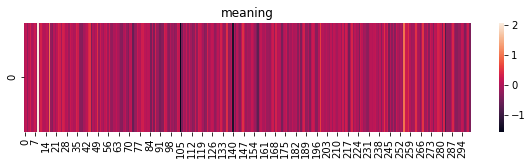

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_vector(word, nlp):
  """Plots a heatmap of a word vector"""
  doc_text = nlp(word)
  fig, ax = plt.subplots(figsize=(10, 2))
  sns.heatmap([doc_text[0].vector], ax=ax)
  ax.set_title(doc_text[0].text)
  plt.show()

plot_word_vector("meaning", nlp_en)

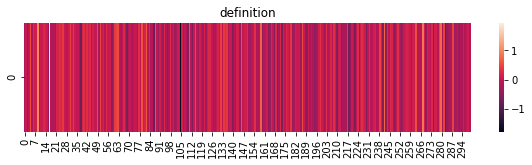

In [29]:
plot_word_vector("definition", nlp_en)

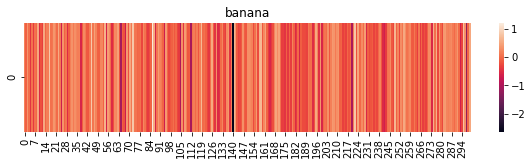

In [30]:
plot_word_vector("banana", nlp_en)

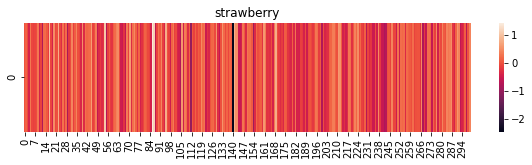

In [31]:
plot_word_vector("strawberry", nlp_en)

### Word Similarity

How do we compare two words? By ranking them in distance from one another.

A common distance measurement is Euclidean distance. Cosine similarity is an alternative measurement that just looks at direction, not magnitude. 

In [32]:
from scipy.spatial.distance import euclidean

def compute_distances(ref_word, other_word, nlp):
  """Computes distances of other word from ref word
  Returns (euclidean_disstance, cosine_similarity)
  """
  doc_ref_word = nlp(ref_word)
  doc_other_word = nlp(other_word)

  vec_ref_word = doc_ref_word[0].vector
  vec_other_word = doc_other_word[0].vector

  return euclidean(vec_ref_word, vec_other_word), \
    doc_ref_word.similarity(doc_other_word)

compute_distances("meaning", "definition", nlp_en)

(4.856840133666992, 0.6071904297086296)

In [33]:
compute_distances("meaning", "banana", nlp_en)

(7.688778400421143, 0.17432999270501778)

In [34]:
compute_distances("strawberry", "banana", nlp_en)

(5.140804290771484, 0.7120676031360639)

In [35]:
# teacher, student
compute_distances("老师", "学生", nlp_zh)

(47.06417465209961, 0.627628163765226)

In [36]:
# teacher, president
compute_distances("老师", "总统", nlp_zh)

(67.63304901123047, 0.1306844171792103)

In [37]:
# election, president
compute_distances("竞选", "总统", nlp_zh)

(44.456024169921875, 0.524938677536565)

Another use case is to get the topmost similar words of a word, phrase, or sentence.

We'll try two examples:
- Word level
- Sentence level



In [38]:
# get most similar words to a word

tokens = clean_text(text_en, nlp_en)
tokens[:10] # first 10

[Jobs,
 available,
 Singaporeans,
 infocommunications,
 space,
 years,
 Republic,
 facing,
 huge,
 shortage]

In [39]:
import numpy as np
def get_most_similar_words(text, nlp, topN=10):
  """Returns the most similar words to a text"""
  doc = nlp(text)

  # https://spacy.io/api/vectors#most_similar
  # most_similar expects a numpy 2D array
  # and returns as a (keys, best_rows, scores) tuple
  keys, best_rows, scores = nlp.vocab.vectors.most_similar(np.array([doc.vector]),
                                                           n=topN)
  
  # do a key to string table lookup
  # keys is a numpy 2D array, so we flatten it
  return [(nlp.vocab.strings[k], score) 
    for k, score in zip(keys.flatten(), scores.flatten())]

get_most_similar_words("Jobs", nlp_en)

[('jobs', 1.0),
 ('VACANCIES', 1.0),
 ('job', 0.7648),
 ('JOB', 0.7648),
 ('SALARIES', 0.6708),
 ('Reemployment', 0.6606),
 ('CAREERS', 0.6013),
 ('PayScale', 0.5885),
 ('Rehiring', 0.5749),
 ('UNIONIZED', 0.5459)]

In [40]:
for t in tokens[:10]:
  print(t.text)
  print(get_most_similar_words(t.text, nlp_en))
  print()

Jobs
[('jobs', 1.0), ('VACANCIES', 1.0), ('job', 0.7648), ('JOB', 0.7648), ('SALARIES', 0.6708), ('Reemployment', 0.6606), ('CAREERS', 0.6013), ('PayScale', 0.5885), ('Rehiring', 0.5749), ('UNIONIZED', 0.5459)]

available
[('free-of-charge', 1.0), ('OFFERRED', 0.6232), ('AVAILABILITIES', 0.6127), ('OPTIONS', 0.6043), ('OFFER', 0.5945), ('offer', 0.5945), ('limted', 0.5901), ('limited', 0.5901), ('PROVIDED', 0.5842), ('PROVIDE', 0.5789)]

Singaporeans
[('SINGAPOREANS', 1.0), ('bumiputras', 0.7055), ('GEORGIANS', 0.6541), ('ARGENTINIANS', 0.6435), ('SAXONS', 0.6432), ('LATINS', 0.6387), ('Asians', 0.6387), ('Americans', 0.6375), ('AMericans', 0.6375), ('Kwazulu', 0.6353)]

infocommunications
[('ALADDIN', 0.0), ('CLUTCHES', 0.0), ('twin', 0.0), ('erratum', 0.0), ('AFFIRMATION', 0.0), ('bronze', 0.0), ('DETONATION', 0.0), ('WRITES', 0.0), ('WELL-QUALIFIED', 0.0), ('COMMISH', 0.0)]

space
[('SPACE', 1.0), ('space', 1.0), ('SPACES', 0.7454), ('ROOM', 0.5857), ('room', 0.5857), ('safe-keeping

In [41]:
def get_sentence_most_similar_words(text, nlp):
  """get most similar words to a sentence
  """
  cleaned = clean_text(text, nlp_en)
  cleaned_text = ' '.join([t.text for t in cleaned])
  return get_most_similar_words(cleaned_text, nlp_en)

for s in doc_en.sents:
  print(s)
  print(get_sentence_most_similar_words(s.text, nlp_en))
  print("-----")

Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.


[('THere', 0.6941), ('there', 0.6941), ('There', 0.6941), ('government', 0.6937), ('STATE-RUN', 0.6937), ('people', 0.692), ('PEople', 0.692), ('People', 0.692), ('that', 0.687), ('tHaT', 0.687)]
-----
Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.


[('theY', 0.6615), ('They', 0.6615), ('they', 0.6615), ('Even', 0.6549), ('even', 0.6549), ('EVen', 0.6549), ('because', 0.6506), ('Because', 0.6506), ('becAuse', 0.6506), ('STATE-RUN', 0.6495)]
-----
He said digitalisation and disruption had already taken root when the current crisis struck.
[('that', 0.7123), ('tHaT', 0.7123), ('That', 0.7123), ('COuld', 0.7018), ('Could', 0.70

Many enhancements we can make, such as:

1. Removing stop words from the suggestions
2. Normalising the case. Currently the string table contains words for different cases.
3. Removing misspelt words (this is tough to guarantee, but you can use third party Python spell checker libraries)

In [49]:
def get_most_similar_words_v2(text, nlp, topN=20):
  """Returns the most similar words to a text
    ignoring stopwords and normalising the case.
  """
  doc = nlp(text)

  # https://spacy.io/api/vectors#most_similar
  # most_similar expects a numpy 2D array
  # and returns as a (keys, best_rows, scores) tuple
  keys, best_rows, scores = nlp.vocab.vectors.most_similar(np.array([doc.vector]),
                                                           n=topN)
  
  # do a key to string table lookup
  # keys is a numpy 2D array, so we flatten it
  candidates = [(nlp.vocab.strings[k], score) 
    for k, score in zip(keys.flatten(), scores.flatten())]

  # remove stopwords and normalise-case
  return {c[0].lower():c[1] for c in candidates if not nlp(c[0])[0].is_stop}

def get_sentence_most_similar_words(text, nlp):
  """get most similar words to a sentence
  """
  cleaned = clean_text(text, nlp)
  cleaned_text = ' '.join([t.text for t in cleaned])
  return get_most_similar_words_v2(cleaned_text, nlp)

def show_per_sentence_topics(text, nlp):
  """Prints topics (top similar words) for each sentence in the text"""
  doc = nlp(text)
  for s in doc.sents:
    print(s)
    print(get_sentence_most_similar_words(s.text, nlp))
    print("-----")

show_per_sentence_topics(text_en, nlp_en)

Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.


{'state-run': 0.6937, 'government': 0.6937, 'people': 0.692, 'country': 0.6857}
-----
Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.


{'state-run': 0.6495, 'government': 0.6495, 'concerned': 0.6375, 'saying': 0.6371}
-----
He said digitalisation and disruption had already taken root when the current crisis struck.
{'concern': 0.6966, 'likely': 0.6921, 'situation': 0.6858, 'crisis': 0.674, 'sovereign-debt': 0.674, 'caused': 0.6734, 'concerned': 0.6676}
-----
Covid-19 accelerated these trends.


{'megatrends': 0.8187, 'accelerated': 0.7906, 'trend': 0.7339, 'decelerating': 0.6797, 'time-to-market': 0.6441, 'growth': 0.6284, 'e

In [50]:
show_per_sentence_topics(text_zh, nlp_zh)

今年的8月9日对林猷冠来说，将和往年大为不同。
{'11月': 0.8062, '10月\x08': 0.8013, '张素)': 0.7832, '购乐彩': 0.7815, '7-8日': 0.7773, '宋宇晟': 0.7748, '杨艳敏': 0.7695, '11月\x07': 0.7694, '白天夜': 0.7667, '旅游塔': 0.7662, '2时30分': 0.7484, '樊曦': 0.7469, '１１日': 0.744, '26-27日': 0.7422, '2时45分': 0.7389, '16日': 0.7339, '米林县派': 0.7301, '09日': 0.7284, '２５日': 0.7279, 'e夜': 0.7276}
-----
这位过去60年里每年都必定亲临现场为新加坡庆生的“最忠实出席者”，今年因国庆形式调整，首次无法到现场庆祝国庆。


{'开庆': 0.6044, '最野': 0.6032, '庆回归': 0.5946, '踩线': 0.578, '9点整': 0.5717, '团们': 0.5554, '接旗': 0.5512, '期间': 0.5443, '东浩兰生': 0.5421, '主题月': 0.5301, '即\x07': 0.5272, '斋日': 0.5214, '参加县': 0.5171, '场\x05': 0.5169, '于此同时': 0.5096, '师来': 0.5087, '鲁璐': 0.5077, '7日早': 0.5069}
-----
林猷冠（75岁）
{'雪君': 0.8906, '鲁比诺': 0.6856, '周b': 0.6686, '飞即': 0.5398, '歲人': 0.5257, '年龄\x06': 0.4405, '世寿': 0.426, '东北爷们': 0.4056, '年后': 0.4034, '160cm': 0.403, 'n个': 0.3998, '华氏度': 0.3997, '图片p': 0.3949, '纪大': 0.3913, '年头\x05': 0.3902, '百分比\x08': 0.3895, '九成\x08': 0.3839, '尹峰': 0.3827}
-----
不只每年看国庆，早年还是在庆典上亮相的表演者，每年表演醒狮。




### Bonus demo: Comparing two texts for similarity

Whose speech is more similar?

We take the first 5-6 paragraphs of past US presidential inauguration speeches (after the greeting), and run through spaCy to get the speech similarity.

Guess whose speeches are more similar?

In [51]:
# https://www.whitehouse.gov/briefings-statements/the-inaugural-address/
trump_speech = """We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together we will determine the course of America and the world for many, many years to come.	   2
  We will face challenges. We will confront hardships. But we will get the job done. Every four years, we gather on these steps to carry out the orderly and peaceful transfer of power.	   3
  And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.	   4
  Today’s ceremony, however, has very special meaning. Because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, D.C., and giving it back to you, the people.	   5
  For too long, a small group in our nation’s capital has reaped the rewards of government while the people have borne the cost. Washington flourished, but the people did not share in its wealth. Politicians prospered, but the jobs left and the factories closed."""

# https://www.bartleby.com/124/pres69.html
obama_speech = """Each time we gather to inaugurate a president, we bear witness to the enduring strength of our Constitution. We affirm the promise of our democracy. We recall that what binds this nation together is not the colors of our skin or the tenets of our faith or the origins of our names. What makes us exceptional—what makes us American—is our allegiance to an idea articulated in a declaration made more than two centuries ago: “We hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable rights, that among these are Life, Liberty, and the pursuit of Happiness.”	   1
  Today we continue a never-ending journey to bridge the meaning of those words with the realities of our time. For history tells us that while these truths may be self-evident, they have never been self-executing; that while freedom is a gift from God, it must be secured by His people here on Earth. The patriots of 1776 did not fight to replace the tyranny of a king with the privileges of a few or the rule of a mob. They gave to us a Republic, a government of, and by, and for the people: entrusting each generation to keep safe our founding creed.	   2
  For more than two hundred years, we have.	   3
  Through blood drawn by lash and blood drawn by sword, we learned that no union founded on the principles of liberty and equality could survive half-slave and half-free. We made ourselves anew, and vowed to move forward together.	   4
  Together, we determined that a modern economy requires railroads and highways to speed travel and commerce, schools and colleges to train our workers.
"""

# https://www.bartleby.com/124/pres56.html
kennedy_speech = """we observe today not a victory of party, but a celebration of freedom—symbolizing an end, as well as a beginning—signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three quarters ago.	   1
  The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe—the belief that the rights of man come not from the generosity of the state, but from the hand of God.	2
  We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation of Americans—born in this century, tempered by war, disciplined by a hard and bitter peace, proud of our ancient heritage—and unwilling to witness or permit the slow undoing of those human rights to which this Nation has always been committed, and to which we are committed today at home and around the world.	3
  Let every nation know, whether it wishes us well or ill, that we shall pay any price, bear any burden, meet any hardship, support any friend, oppose any foe, in order to assure the survival and the success of liberty.	4
  This much we pledge—and more."""

# https://www.bartleby.com/124/pres62.html
reagan_speech = """This day has been made brighter with the presence here of one who, for a time, has been absent—Senator John Stennis.	   1
  God bless you and welcome back.	2
  There is, however, one who is not with us today: Representative Gillis Long of Louisiana left us last night. I wonder if we could all join in a moment of silent prayer. (Moment of silent prayer.) Amen.	3
  There are no words adequate to express my thanks for the great honor that you have bestowed on me. I will do my utmost to be deserving of your trust.	4
  This is, as Senator Mathias told us, the 50th time that we the people have celebrated this historic occasion. When the first President, George Washington, placed his hand upon the Bible, he stood less than a single day's journey by horseback from raw, untamed wilderness. There were 4 million Americans in a union of 13 States. Today we are 60 times as many in a union of 50 States. We have lighted the world with our inventions, gone to the aid of mankind wherever in the world there was a cry for help, journeyed to the Moon and safely returned. So much has changed. And yet we stand together as we did two centuries ago.	"""

doc_trump = nlp_en(trump_speech)
doc_obama = nlp_en(obama_speech)
doc_reagan = nlp_en(reagan_speech)
doc_jfk = nlp_en(kennedy_speech)

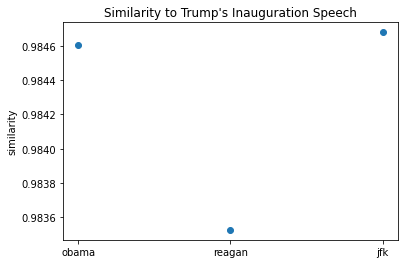

In [69]:
# compute similarity for the speech and plot in a graph
scores = {}
for person, doc in zip(["obama", "reagan", "jfk"], [doc_obama, doc_reagan, doc_jfk]):
  scores[person] = doc_trump.similarity(doc)

plt.scatter(list(scores.keys()), list(scores.values()))
plt.ylabel("similarity")
plt.title("Similarity to Trump's Inauguration Speech")
plt.show()

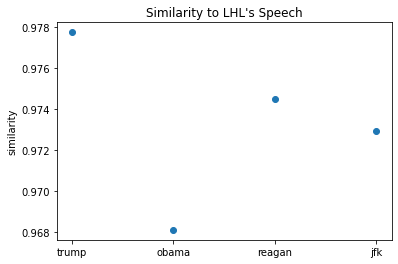

In [65]:
# https://www.channelnewsasia.com/news/singapore/full-speech-pm-lee-president-dissolve-parliament-writ-election-12862420

lhl_speech = """Let me explain why I have decided to call the general election now.

We are approaching the end of the five-year term of this Government. Under the Constitution, elections must be held at the latest by April 2021. That is less than a year away.

We have been fully occupied with the COVID-19 outbreak since the beginning of the year. The pandemic set upon the world suddenly. It quickly grew into a global crisis, spreading across many countries.

Around the world, nearly half a million people have died, and countless more have seen their lives disrupted.

Singapore detected our first cases in January.

At first, most were imported. But soon we observed a growing number of local cases, with no links to infected visitors."""

doc_lhl = nlp_en(lhl_speech)

scores = {}
for person, doc in zip(["trump", "obama", "reagan", "jfk"], 
                       [doc_trump, doc_obama, doc_reagan, doc_jfk]):
  scores[person] = doc_lhl.similarity(doc)

plt.scatter(list(scores.keys()), list(scores.values()))
plt.ylabel('similarity')
plt.title("Similarity to LHL's Speech")
plt.show()

In [66]:
# what are the main topics for the most similar speeches?

show_per_sentence_topics(lhl_speech, nlp_en)

Let me explain why I have decided to call the general election now.


{'explain': 0.7717, 'decided': 0.7591, 'let': 0.7523, 'reason': 0.7479, 'decide': 0.7464}
-----
We are approaching the end of the five-year term of this Government.
{'end': 0.7583, 'year': 0.7289, 'state-run': 0.7168, 'government': 0.7168, 'term': 0.7116, 'commencing': 0.6985, 'expected': 0.6847, 'past': 0.6827, 'coming': 0.6814, 'comming': 0.6814}
-----
Under the Constitution, elections must be held at the latest by April 2021.
{'mid-term': 0.7891, 'post-election': 0.7653, 'constitution': 0.6714, 'constitutions': 0.6714, 'vice-presidential': 0.6263, 'parliament': 0.6222, '150-member': 0.6222, 'cityhood': 0.6198, 'democratic': 0.6161, 'democractic': 0.6161, 'government': 0.6127, 'state-run': 0.6127, 'second-term': 0.5998, 'state-level': 0.5976, 'voting': 0.5965, 'quorum': 0.5965, 'gerrymandered': 0.5958, 'congress': 0.5917, 'non-elected': 0.5847}
-----
That is less than a year away.


{'year': 0.8419, 'away': 0.8165,

In [67]:
show_per_sentence_topics(trump_speech, nlp_en)

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.
{'country': 0.7664, 'nation': 0.7455, 'people': 0.7155, 'citizens': 0.7073, 'tax-paying': 0.7073, 'spearhead': 0.7043, 'way': 0.6953, 'bring': 0.6923, 'effort': 0.6919, 'hope': 0.6903}
-----
Together we will determine the course of America and the world for many, many years to come.	   
{'world': 0.7734, 'come': 0.7363}
-----
2
  
{'2': 1.0, '3': 0.9514, '4': 0.9089, '1': 0.8826, '5': 0.7948, '6': 0.7929, '8': 0.7059, '7': 0.6842, '9': 0.6731, '10': 0.5904, '11': 0.5797, '12': 0.5779, '13': 0.5553, '1-2': 0.5542, '31/2': 0.5513, '16': 0.5441, '14': 0.5375, '15': 0.5342, '31-35': 0.518, '2-3': 0.5071}
-----
We will face challenges.
{'challenges': 0.8415, 'face': 0.8344, 'faced': 0.7425, 'faces': 0.7314, 'challenge': 0.7304, 'challange': 0.7304, 'facing': 0.6599, 'unmask': 0.648, 'challenging': 0.6423, 'insurmountable': 0.6305, 'difficult': 0.6222, 